# Week 4: Lab Work - Regression Model Development and Evaluation

In [1]:
# Import the libraries required, for example: import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
#from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

## Load ‘tips’ dataset from seaborn library

In [2]:
# Load the dataset "tips" from seaborn package using sns object.
tips = sns.load_dataset("tips")

In [3]:
# Print the head of the data to have an idea.
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# Check the size of the dataset
tips.shape

(244, 7)

In [5]:
# Check the variables/columns and the data types and
#see if we can predict tips using total_bill for example? You can use info()
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## <font color='red'>Objective</font>: Using Linear Regression Algorithm, we aim to predict tips on the basis of total bill.

<Axes: xlabel='total_bill', ylabel='tip'>

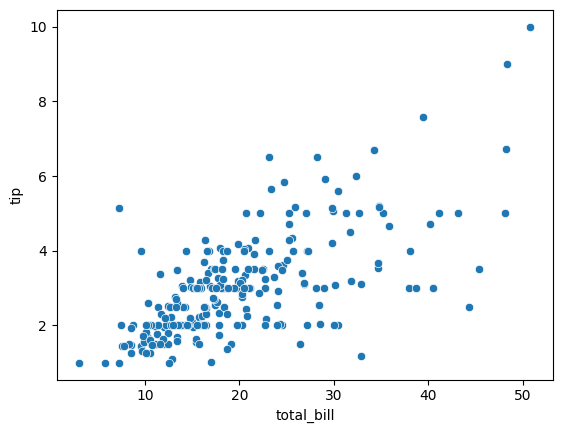

In [6]:
# Can you plot a scatterplot below to see whether total bill tends to proprotionally increase with the tip?
# This way we can be sure to use 'total_bill' feature to predict 'tip' target value by observing the correlation.
sns.scatterplot(x='total_bill',y='tip',data=tips)

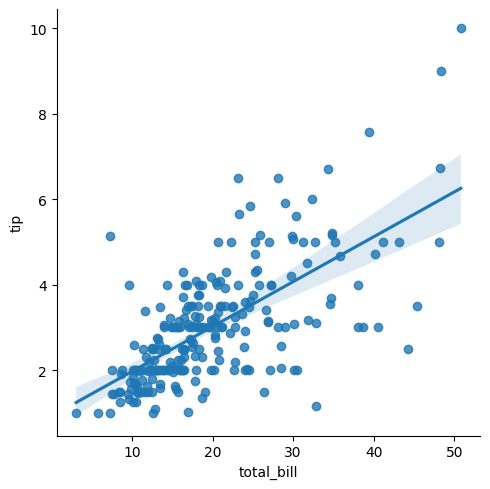

In [7]:
# Consider using regplot() or lmplot function to see this trend much clearly.
sns.lmplot(x="total_bill", y="tip", data=tips)

# Model Development

## Divide the dataset into two parts, x for total_bill features, y for tip target value.

In [8]:
X= tips[['total_bill']]
y= tips['tip'] # changed to dataframe so that regplot prints the axis name tip.

# Better to define features as a dataframe [[]]
# Predicted value can be defined as series []
# The target variable (y) is often defined as a Series because it represents a single column of values corresponding to the output labels or
# regression targets. Machine learning models are generally fine with the target variable being in a one-dimensional format.
# Since y only holds the target values, there's no need to keep it in a 2D DataFrame format, e.g. (244,1).

# Train-Test Split
- Train-test split is a technique used in machine learning to evaluate the performance of a model on unseen data. It is used to split the data into two parts: a training set and a test set. The training set is used to train the model, while the test set is used to evaluate the model’s performance on unseen data. This helps to ensure that the model is not overfitting the data, and that it is generalizing well to unseen data.

In [9]:
#Split the data into training and test sets using train_test_split. Spare 80% for training set and 20% for the test set.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [10]:
# You can check the size of each variables: X_train, X_test, y_train,
# y_test whether they match in size using data.shape
y_test.shape

(49,)

In [11]:
# Define Linear Regression model
model = LinearRegression()

## General approach
# 1- Identify and allocate X and y, features and the target value.
# 2- Split the dataset into X_train, X_test, y_train, y_test.
# 3- Determine the model - whether it is linear regression/random forest etc. you want to use?
# 4- Fit the data - train X_train with y_train so as to teach the model the correlation between X and y.
# 4th step is done so that Beta values are estimated, which can then be used to estimate the y values on a new unseen data (X_test in our case).

In [12]:
# Fit the model to the given data, X_train is fitted with weights
# (Beta values from in-class slides) to the value y_train, using fit() function
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Make prediction using the unseen X_test data using predict() function
y_predictions = model.predict(X_test)

<Axes: xlabel='total_bill', ylabel='tip'>

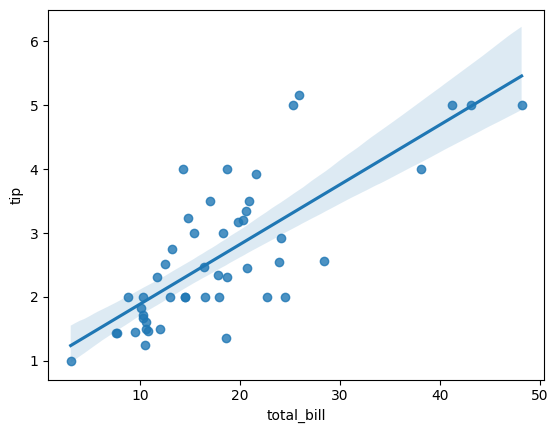

In [14]:
# Plot the true data points of X_test and y_test using regplot
sns.regplot(x=X_test, y=y_test)

<Axes: xlabel='total_bill'>

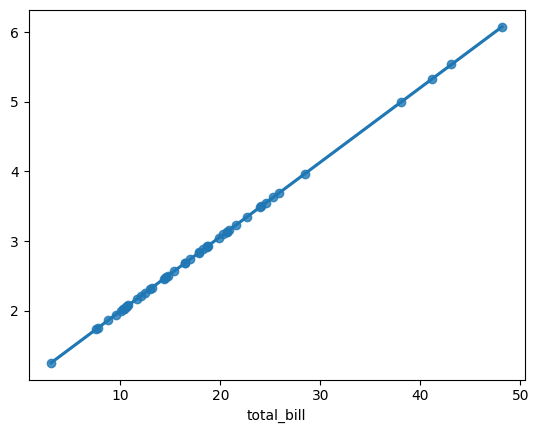

In [15]:
# Predicted the target value tip
sns.regplot(x=X_test, y=y_predictions)

In [16]:
# Use MAE to measure the average magnitude of the errors in a set of predictions.
# Closer to zero means better accuracy.
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_predictions)

0.6208580000398983

In [17]:
# Use RMSE to measure the average of the suares of the errors or deviations from the actual value.
# It is used to measure the accuracy of a model in predicting the outcome of a given data set.
# Closer to zero means better accuracy.
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predictions)

0.5688142529229538

In [18]:
# Extra information on evaluation of regression, search for 'R^2 score' and implement.
# Closer to one means better accuracy.
from sklearn.metrics import r2_score
r2_score(y_test,y_predictions)

0.5449381659234663

In [19]:
# Print y_prediction vs y_test side-by-side to visibly compare.
output=np.column_stack((y_predictions, y_test))
print(output)

[[3.04525623 3.18      ]
 [1.86330727 2.        ]
 [3.55119456 2.        ]
 [3.69452593 5.16      ]
 [2.31576375 2.        ]
 [2.83881627 2.        ]
 [3.96728338 2.56      ]
 [2.26014262 2.52      ]
 [2.50615915 3.23      ]
 [2.57033737 3.        ]
 [2.88160176 3.        ]
 [2.07723468 1.47      ]
 [2.06439904 1.5       ]
 [2.47407003 2.        ]
 [2.00236009 1.83      ]
 [2.91903905 1.36      ]
 [2.92652651 4.        ]
 [3.23351235 3.92      ]
 [2.68478854 2.47      ]
 [5.33107064 5.        ]
 [3.13831465 2.45      ]
 [3.13403611 3.35      ]
 [2.4558862  4.        ]
 [1.94673896 1.45      ]
 [3.16077703 3.5       ]
 [2.17564129 2.31      ]
 [2.02375283 1.71      ]
 [3.62927807 5.        ]
 [2.68906708 2.        ]
 [6.07767732 5.        ]
 [4.99734388 4.        ]
 [1.75313465 1.44      ]
 [2.83025918 2.34      ]
 [3.09552917 3.21      ]
 [2.74040966 3.5       ]
 [3.50092162 2.92      ]
 [2.21200895 1.5       ]
 [5.53644096 5.        ]
 [2.33287794 2.75      ]
 [3.35010279 2.        ]


In [20]:
# Define a new function that calculates the mean absolute error
# from y_test to y_predictions
def mean_abs_err(y_true, y_pred):
#y_pred=y_predictions
#y_true=y_test
    # Ensure both input arrays/lists have the same length
    assert len(y_true) == len(y_pred), "Arrays have to match in size"
    # Calculate the absolute differences
    absolute_errors = [abs(true - pred) for true, pred in zip(y_true, y_pred)]
    #mae_result=sum(absolute_errors) / len(absolute_errors)
    #print(mae_result)
    # Return the mean of the absolute errors
    return sum(absolute_errors) / len(absolute_errors)

In [21]:
mean_abs_err(y_test, y_predictions)

0.6208580000398985

## Challenging task (optional)
*   **Predict housing prices**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load dataset: housing.csv
file_path = "datasets/housing.csv"
df = pd.read_csv(file_path)

# Step 1: Data Preprocessing
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Handle missing values by filling with median if any
df_numeric.fillna(df_numeric.median(), inplace=True)



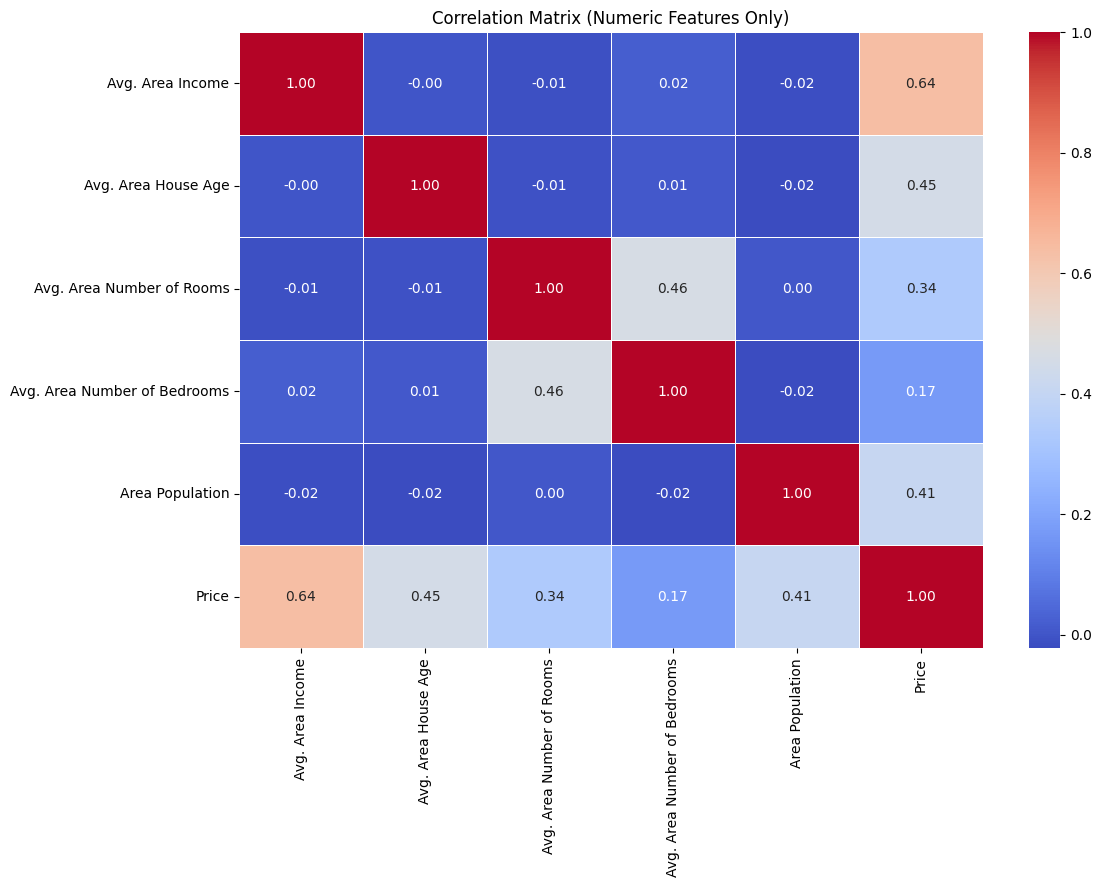

In [25]:
# Step 2: Exploratory Data Analysis (EDA)
# Compute and visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()



In [26]:
# Step 3: Feature Selection Using Variance Inflation Factor (VIF) (Multicollinearity Handling)
# Search for VIF and understand the context before using it
# Write a function to calculate VIF for each feature using variance_inflation_factor function
def compute_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

# Call the aforementioned function to Compute VIF and see highly collinear features in the dataset
vif_df = compute_vif(df_numeric.drop(columns=['Price'], errors='ignore'))
print("\nVariance Inflation Factor (VIF) Analysis:")
print(vif_df)

# Remove features with high multicollinearity, i.e., VIF > 30
high_vif_features = vif_df[vif_df["VIF"] > 50]["Feature"].tolist()
df_numeric = df_numeric.drop(columns=high_vif_features, errors='ignore')

print(df_numeric.head())


Variance Inflation Factor (VIF) Analysis:
                        Feature        VIF
0              Avg. Area Income  29.650899
1           Avg. Area House Age  27.447775
2     Avg. Area Number of Rooms  45.257291
3  Avg. Area Number of Bedrooms  14.537873
4               Area Population  12.825450
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  
0                          4.09      23086.80050  1.059034e+06  
1                          3.09      40173.07217  1.505891e+06  
2                          5.13      36882.15940  1.058988e+06  
3           

In [27]:
# Step 4: Splitting Data for Model Training, 'Price' is your target variable
X = df_numeric.drop(columns=['Price'])
y = df_numeric['Price'] # Last column as target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Step 5: Training and Evaluating a Linear Regression Model
# Select and Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict using the model and X_test
y_pred = lr_model.predict(X_test)

## Model Evaluation using RMSE and R^2 and print the outputs using the following prints
# write HERE for the evaluation of RME and R^2
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
# print the output
print("\nLinear Regression Model Evaluation:")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")




Linear Regression Model Evaluation:
Root Mean Squared Error (RMSE): 100444.061
R² Score: 0.918


In [29]:
# Step 6: Search for Regularisation with Ridge and Lasso Regression and use them in this task to improve results and observe if it helps
# Play with alpha values and observe if there is any changes
# RIDGE
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_r2 = r2_score(y_test, ridge_pred)
# LASSO
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_r2 = r2_score(y_test, lasso_pred)
# print the output
print("\nRegularization Results:")
print(f"Ridge Regression - RMSE: {ridge_rmse:.3f}, R²: {ridge_r2:.3f}")
print(f"Lasso Regression - RMSE: {lasso_rmse:.3f}, R²: {lasso_r2:.3f}")




Regularization Results:
Ridge Regression - RMSE: 100447.581, R²: 0.918
Lasso Regression - RMSE: 100444.067, R²: 0.918


In [30]:
# Step 7: Feature Importance
# Get feature importance using the Linear Regression coefficients and print
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(lr_model.coef_)}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Linear Regression Coefficients):")
print(feature_importance)




Feature Importance (Linear Regression Coefficients):
                        Feature     Importance
1           Avg. Area House Age  164666.480720
2     Avg. Area Number of Rooms  119624.012231
3  Avg. Area Number of Bedrooms    2440.377612
0              Avg. Area Income      21.652206
4               Area Population      15.270313


In [31]:
# Step 8: Change VIF value from 30 to 50 at the end of Step 3 and observe/comment on your findings.
# How did this change affect the selected features and the model performance?

# When NOT to Rely Solely on VIF

VIF is not always a strict rule for feature elimination because:

1- Multicollinearity doesn't always harm prediction: If you only care about prediction accuracy and not coefficient interpretation, keeping collinear variables can sometimes improve performance.

2- VIF does not indicate causation: A high VIF simply means a feature is highly correlated with others, but it does not mean it should be removed unless it negatively affects the model.

3- Feature importance matters more: If a feature with high VIF is also highly important for prediction, removing it could degrade model performance.

4- Some models handle collinearity well: Regularized models like Ridge Regression and Lasso Regression can handle multicollinearity effectively without needing to remove features.

*   VIF should be a guiding metric, not a hard rule for feature selection.
*   If performance improves with high-VIF features, keep them!
*   Multicollinearity is a problem only when it degrades model performance or interpretability.
*   Regularization methods (Ridge, Lasso) can handle high-VIF features without removing them.

